# Initializing Supervised Learning

## 1. Purpose

Apply supervised learning methods to the data

## 2. Preparation

### 2.0 Import Required Packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn import preprocessing, neighbors
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, LeaveOneOut

### 2.1 Load Data

In [7]:
## All Data are too heavy
#alldata = pd.read_csv("../../data/alldata_traincode_170510.csv", encoding='CP932')
#allWrdMat10 = pd.read_csv("../../allWrdMat10.csv", encoding='CP932')

## Test on Cabinet Data
#cabinetdata = pd.read_csv('../data_public/cabinetdata_traincode.csv', encoding='CP932', na_values='NA')
#cabinetWrdMat10 = pd.read_csv('../data_public/cabinetWrdMat10.csv', encoding='CP932', na_values='NA')

## Test on LDP Data
#ldpdata = pd.read_csv('../data_public/ldpdata_traincode.csv', encoding='CP932', na_values='NA')
#ldpWrdMat10 = pd.read_csv('../data_public/ldpWrdMat10.csv', encoding='CP932', na_values='NA')

## Test on Politics Data (FOR THIS EXAMPLE)
politicsdata = pd.read_csv('../data_public/politicsdata_traincode.csv', encoding='CP932', na_values='NA')
politicsWrdMat10 = pd.read_csv('../data_public/politicsWrdMat10.csv', encoding='CP932', na_values='NA')

In [6]:
politicsdata.head(3)

,id_all,id_inpaper,id_original,year,month,date,ymonth,Headline,paper,wcount,Asahi,Yomiuri,jijistartdate,jijiymonth,cabinet,ldp,politics,codeN,train
0,3,3,5,1987,11,7,198711,政策遂行は党主導か 竹下内閣発足＜解説＞,A,1033.0,1.0,NaN,7,198711,1,0,1,NaN,0
1,10,3,3,1987,11,7,198711,大胆な発想と実行の政治を 初閣議で竹下首相説示,Y,403.0,NaN,1.0,7,198711,1,0,1,NaN,0
2,17,7,8,1987,11,8,198711,「合意と決断の政治」 竹下首相、初会見で強調 内需拡大へ大型予算,Y,1470.0,NaN,1.0,7,198711,1,0,1,NaN,0


In [7]:
politicsWrdMat10.head(3)

,?,．,・,％,０,１,１０月,１１月,１２月,１月,...,論考,論説,論戦,和歌山,和平,枠,枠組み,湾岸,拉致,盧
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Prepare Training Data and Testing Data

In [8]:
targetx = politicsWrdMat10
targety = politicsdata

X = np.array(targetx.loc[targety['train'] == 1,:])
y = np.array(targety.loc[targety['train'] == 1,'codeN'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

## 3. Conduct Classification

### 3.1 K Nearest Neighbors

In [27]:
## With k = 10
k = 10
knn1 = neighbors.KNeighborsClassifier(n_neighbors=k) ##knn estimation
knn1.fit(X_train, y_train)

## On Test Set
proby = knn1.predict_proba(X_test)[:,1]  # predicted Y
knn1fpr, knn1tpr, _  = roc_curve(y_test, proby) #ROC Curve
knn1auc = auc(knn1fpr, knn1tpr) # Area Under Curve (AUC)
knn1prec, knn1rec, _ = precision_recall_curve(y_test, proby) #PR Curve

## With k = 50
k = 50
knn2 = neighbors.KNeighborsClassifier(n_neighbors=k) ##knn estimation
knn2.fit(X_train, y_train)

## On Test Set
proby = knn2.predict_proba(X_test)[:,1]  # predicted Y
knn2fpr, knn2tpr, _  = roc_curve(y_test, proby) #ROC Curve
knn2auc = auc(knn2fpr, knn2tpr) # Area Under Curve (AUC)
knn2prec, knn2rec, _ = precision_recall_curve(y_test, proby) #PR Curve

### 3.2 Logistic Regression (With Newton Conjugate Solver)

In [28]:
## Logistic Regression
logit = skl_lm.LogisticRegression(solver='newton-cg')
logit.fit(X_train,y_train)

## On Test Set
proby = logit.predict_proba(X_test)[:,1]  # predicted Y
logitfpr, logittpr, _  = roc_curve(y_test, proby) #ROC Curve
logitauc = auc(logitfpr, logittpr) # Area Under Curve (AUC)
logitprec, logitrec, _ = precision_recall_curve(y_test, proby) #PR Curve

### 3.3 Linear Discriminant Analysis

In [29]:
## Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

## On Test Set
proby = lda.predict_proba(X_test)[:,1]  # predicted Y
ldafpr, ldatpr, _ = roc_curve(y_test, proby) #ROC Curve
ldaauc = auc(ldafpr, ldatpr) # Area Under Curve (AUC)
ldaprec, ldarec, _ = precision_recall_curve(y_test, proby) #PR Curve

### 3.4 Support Vector Machine

In [30]:
## Support Vector Machines
svmcl = SVC(probability=True)
svmcl.fit(X_train,y_train)

## On Test Set
proby = svmcl.predict_proba(X_test)[:,1]  # predicted Y
svmfpr, svmtpr, _ = roc_curve(y_test, proby) #ROC Curve
svmauc = auc(svmfpr, svmtpr) # Area Under Curve (AUC)
svmprec, svmrec, _ = precision_recall_curve(y_test, proby) #PR Curve

## 4. Compare The Result

### 4.1 ROC Curve

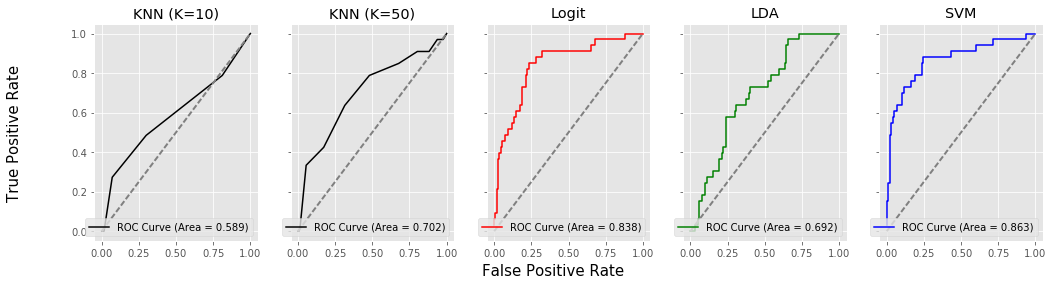

In [34]:
plt.rcParams["figure.figsize"] = (17,4)
f, (ax01, ax02, ax1, ax2, ax3) = plt.subplots(1, 5, sharey=True)
f.text(0.5, 0.02, 'False Positive Rate', ha='center', va='center', fontsize = 15)
f.text(0.06, 0.5, 'True Positive Rate', ha='center', va='center', rotation='vertical', fontsize = 15)

ax01.plot(knn1fpr, knn1tpr, 'k-', label = 'ROC Curve (Area = %0.3f)' % knn1auc)
ax01.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax01.set_title('KNN (K=10)');
ax01.set_xlim(-0.05,1.05)
ax01.set_ylim(-0.05,1.05)
ax01.legend(loc="lower right")

ax02.plot(knn2fpr, knn2tpr, 'k-', label = 'ROC Curve (Area = %0.3f)' % knn2auc)
ax02.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax02.set_title('KNN (K=50)');
ax02.set_xlim(-0.05,1.05)
ax02.set_ylim(-0.05,1.05)
ax02.legend(loc="lower right")

ax1.plot(logitfpr, logittpr, 'r-', label = 'ROC Curve (Area = %0.3f)' % logitauc)
ax1.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax1.set_title('Logit');
ax1.set_xlim(-0.05,1.05)
ax1.set_ylim(-0.05,1.05)
ax1.legend(loc="lower right")

ax2.plot(ldafpr, ldatpr, 'g-', label = 'ROC Curve (Area = %0.3f)' % ldaauc)
ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax2.set_title('LDA');
ax2.set_xlim(-0.05,1.05)
ax2.set_ylim(-0.05,1.05)
ax2.legend(loc="lower right")

ax3.plot(svmfpr, svmtpr, 'b-', label = 'ROC Curve (Area = %0.3f)' % svmauc)
ax3.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax3.set_title('SVM');
ax3.set_xlim(-0.05,1.05)
ax3.set_ylim(-0.05,1.05)
ax3.legend(loc="lower right")

plt.show()

### 4.2 PR Curve

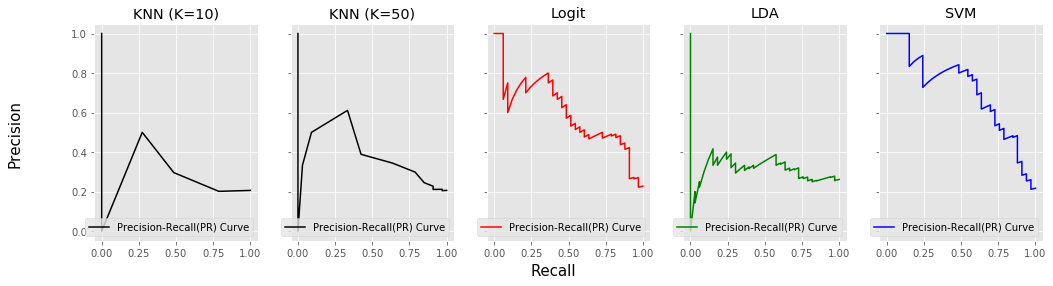

In [35]:
plt.rcParams["figure.figsize"] = (17,4)
f, (ax01, ax02, ax1, ax2, ax3) = plt.subplots(1, 5, sharey=True)
f.text(0.5, 0.02, 'Recall', ha='center', va='center', fontsize = 15)
f.text(0.06, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize = 15)

ax01.plot(knn1rec, knn1prec, 'k-', label = 'Precision-Recall(PR) Curve')
ax01.set_title('KNN (K=10)');
ax01.set_xlim(-0.05,1.05)
ax01.set_ylim(-0.05,1.05)
ax01.legend(loc="lower right")

ax02.plot(knn2rec, knn2prec, 'k-', label = 'Precision-Recall(PR) Curve')
ax02.set_title('KNN (K=50)');
ax02.set_xlim(-0.05,1.05)
ax02.set_ylim(-0.05,1.05)
ax02.legend(loc="lower right")

ax1.plot(logitrec, logitprec, 'r-', label = 'Precision-Recall(PR) Curve')
ax1.set_title('Logit');
ax1.set_xlim(-0.05,1.05)
ax1.set_ylim(-0.05,1.05)
ax1.legend(loc="lower right")

ax2.plot(ldarec, ldaprec, 'g-', label = 'Precision-Recall(PR) Curve')
ax2.set_title('LDA');
ax2.set_xlim(-0.05,1.05)
ax2.set_ylim(-0.05,1.05)
ax2.legend(loc="lower right")

ax3.plot(svmrec, svmprec, 'b-', label = 'Precision-Recall(PR) Curve')
ax3.set_title('SVM');
ax3.set_xlim(-0.05,1.05)
ax3.set_ylim(-0.05,1.05)
ax3.legend(loc="lower right")

plt.show()